In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [3]:
file_path='/content/winequality-red.csv'
wine=pd.read_csv(file_path,delimiter=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.columns=wine.columns.str.strip()

In [5]:
print(wine.info())
print(wine.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

In [6]:
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<ipython-input-7-9fe159d1c012>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality',data=wine,palette='coolwarm')


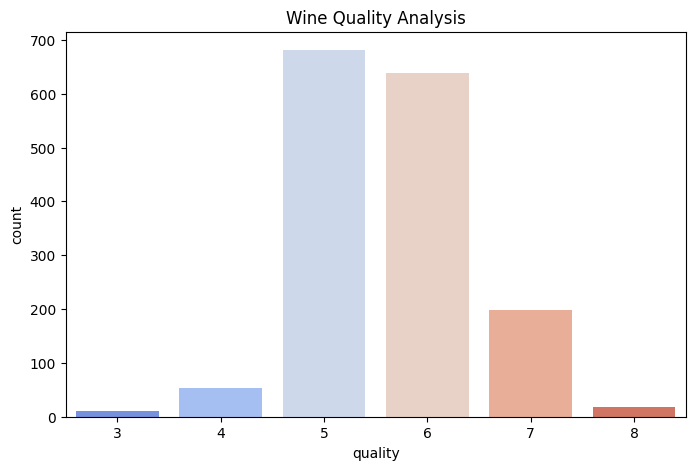

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality',data=wine,palette='coolwarm')
plt.title('Wine Quality Analysis')
plt.show()

In [8]:
x=wine.drop(columns=['quality'])
y=wine['quality']

In [9]:
y=np.where(y>=6,1,0)


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [13]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred=model.predict(x_test_scaled)

In [18]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy Score: 0.784375
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       141
           1       0.81      0.81      0.81       179

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320

Confusion Matrix:
 [[106  35]
 [ 34 145]]


<ipython-input-21-8b9974e13a13>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='alcohol', y='quality', data=wine, palette="dark")


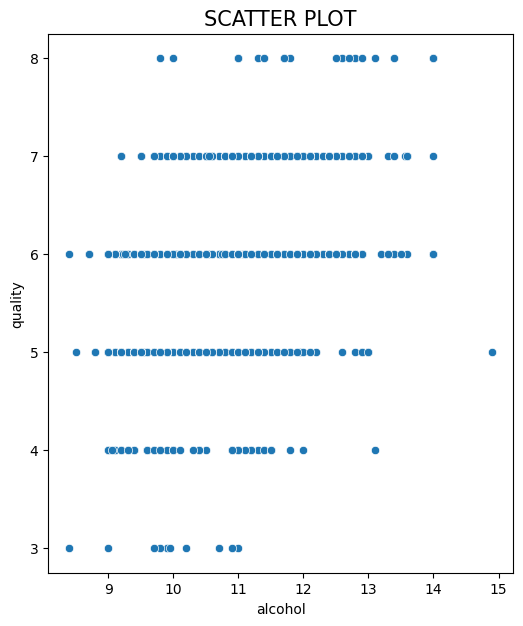

In [21]:
plt.figure(figsize=(6,7))
# Assuming 'x' and 'y' are column names in 'wine' DataFrame
sns.scatterplot(x='alcohol', y='quality', data=wine, palette="dark")
plt.title("SCATTER PLOT",fontsize=15)
plt.show()

<ipython-input-23-8a26923a1f32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alcohol', y='quality', data=wine, palette="dark")


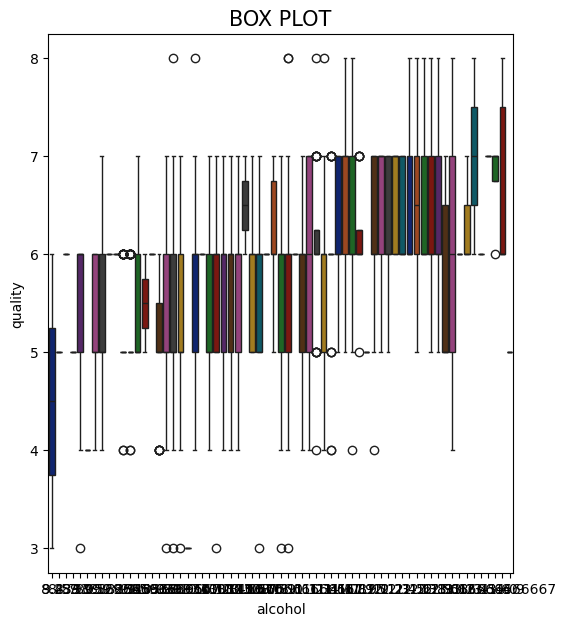

In [23]:
plt.figure(figsize=(6,7))
# Assuming 'x' and 'y' are column names in 'wine' DataFrame
sns.boxplot(x='alcohol', y='quality', data=wine, palette="dark")
plt.title("BOX PLOT",fontsize=15)
plt.show()

<ipython-input-25-6e18e0d2fb8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='alcohol', y='quality', data=wine, palette="dark")


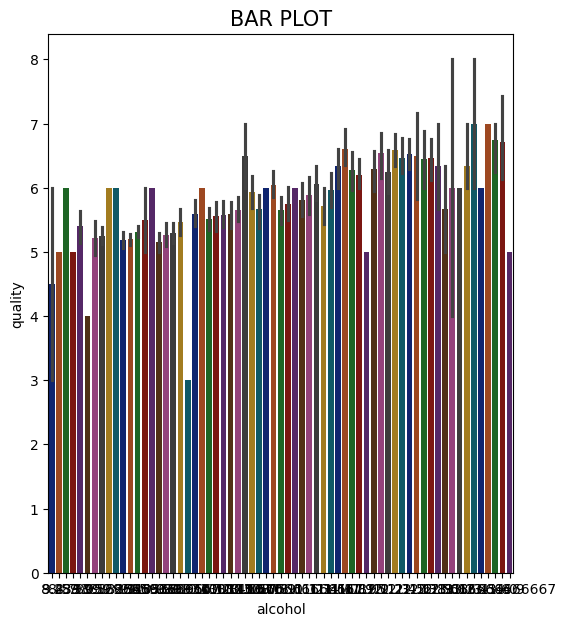

In [25]:
plt.figure(figsize=(6,7))
# Assuming 'x' and 'y' are column names in 'wine' DataFrame
sns.barplot(x='alcohol', y='quality', data=wine, palette="dark")
plt.title("BAR PLOT",fontsize=15)
plt.show()

<ipython-input-26-4e4a77a89c1f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='alcohol', y='quality', data=wine, palette="dark")


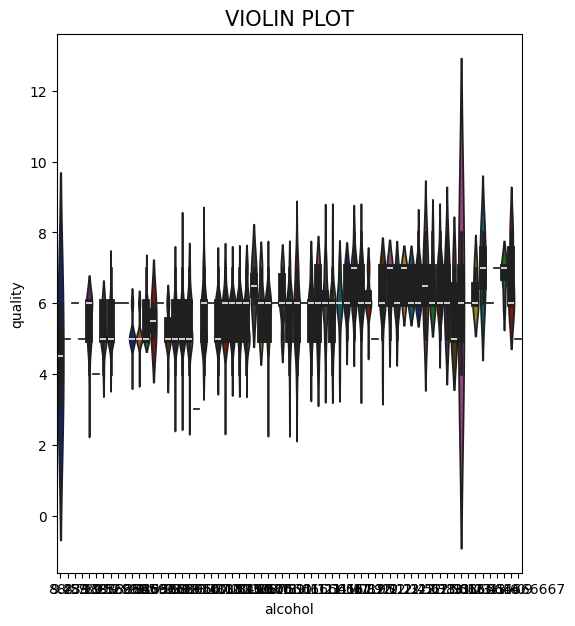

In [26]:
plt.figure(figsize=(6,7))
# Assuming 'x' and 'y' are column names in 'wine' DataFrame
sns.violinplot(x='alcohol', y='quality', data=wine, palette="dark")
plt.title("VIOLIN PLOT",fontsize=15)
plt.show()

<ipython-input-31-a051644962df>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='alcohol', y='quality', data=wine, palette="dark")


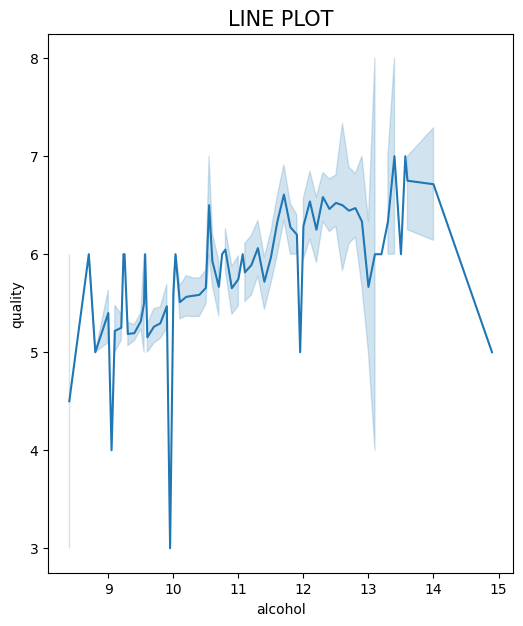

In [31]:
plt.figure(figsize=(6,7))
# Assuming 'x' and 'y' are column names in 'wine' DataFrame
sns.lineplot(x='alcohol', y='quality', data=wine, palette="dark")
plt.title("LINE PLOT",fontsize=15)
plt.show()

<ipython-input-27-e44f970877b6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='alcohol', y='quality', data=wine, palette="dark")


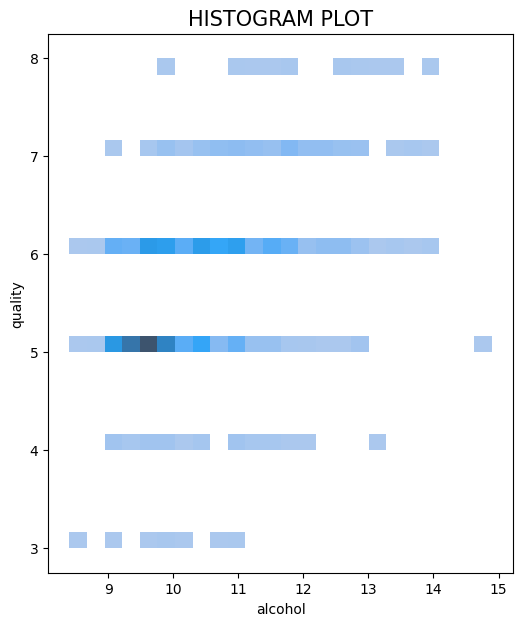

In [27]:
plt.figure(figsize=(6,7))
# Assuming 'x' and 'y' are column names in 'wine' DataFrame
sns.histplot(x='alcohol', y='quality', data=wine, palette="dark")
plt.title("HISTOGRAM PLOT",fontsize=15)
plt.show()

<ipython-input-35-9c174c3303bf>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x="alcohol",y="quality",data=wine,palette="dark")


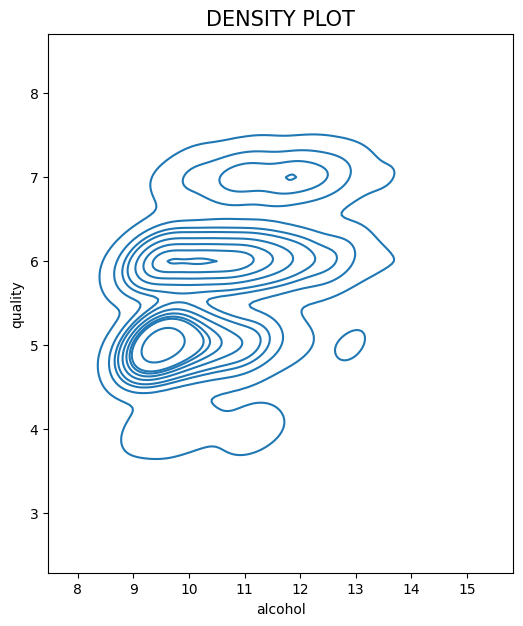

In [35]:
plt.figure(figsize=(6,7))
sns.kdeplot(x="alcohol",y="quality",data=wine,palette="dark")
plt.title("DENSITY PLOT",fontsize=15)
plt.show()


<ipython-input-37-f24eb15420a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality",data=wine,palette="dark")


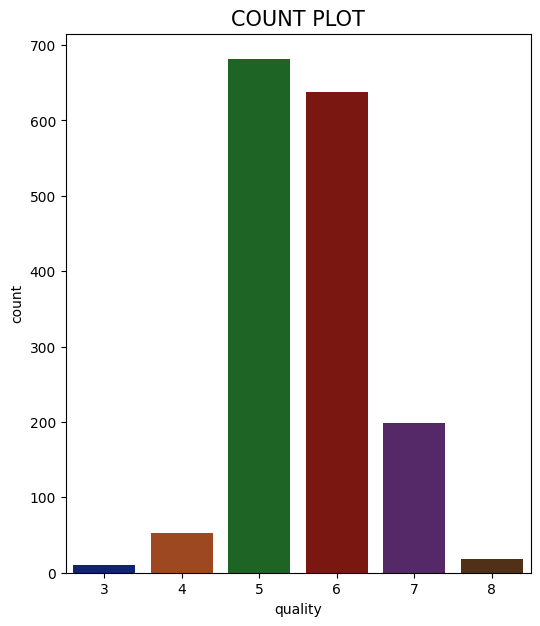

In [37]:
plt.figure(figsize=(6,7))
sns.countplot(x="quality",data=wine,palette="dark")
plt.title("COUNT PLOT",fontsize=15)
plt.show()

In [ ]:
from sklearn.